In [259]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from datetime import datetime
import os
import math

### Function for converting the log data to usable data for generating plots

In [260]:
def getMetrics(saved, logs, bfs_log):
    steps = 10
    harvest_rate = getMovingHarvestRate(saved, logs, steps)
    target_recall = getMovingTargetRecall(saved, bfs_log,steps)
    target_lenght = getMovingTargetLength(saved, logs)
    return harvest_rate, target_recall, target_lenght

def getMovingHarvestRate(saved, logs, steps):
    total = 0
    result = []
    for i in range(steps,logs.shape[0], steps):
        crawled = logs['timestamp'].iloc[total:i]
        total_crawled = crawled.shape[0]
        last_time = crawled.iloc[-1]
#         get all the relevants within the timestamp
        relevant = saved.loc[saved['timestamp'] <= lastime,:]
        result.append((relevant/total_crawled, i))
        
    return result
    

def getMovingTargetRecall(saved, bfs_saved, step):
#     need to align the timing with that of bfs for the corresponding algorithm
#     The best approach will  be to used the present of links and not time
    total = 0
    result = []
    for i in range(steps,bfs_saved.shape[0], steps):
        crawled = set(bfs_saved['url'])
        total_crawled = set(saved['url'].iloc[total:i])
        intersection = crawled.intersection(total_crawled)
        result.append((len(intersection/len(total_crawled), i)))
        
    return result


def getMovingTargetLength(saved, logs):
    count =0
    result =[]
    for row in pd.itertuple(saved):
        url = row.url
        position =logs.loc[logs['url'] == url].index[0]
        count+=1
        result.append((count, position))
    return result
        
                      

## Plot the needed graphs here

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

## The plotting simulation starts here

### Plots based on machine learning model for classification

In [261]:
training_data_part = '../dmoz_links.json'

In [262]:
json_content =[]
with open(training_data_part,'r') as fl:
    json_content = json.load(fl)

In [263]:
list(json_content.keys())
pd.DataFrame(json_content['finance'])

,link,title,description
0,http://20somethingfinance.com/,20 Something Finance,Articles focused on helping young people manag...
1,http://www.aarp.org/money/,AARP - Money and Work,Discussion of money matters in considerable de...
2,http://financialplan.about.com/,About.com: Financial Planning,"Information on personal financial planning, in..."
3,http://www.asec.org/,American Savings Education Council,A coalition of government and industry institu...
4,http://www.bankrate.com/,Bankrate.com,An online publication that provides consumers ...
...,...,...,...
581,http://revenue.wyo.gov/,Wyoming,Wyoming Department of Revenue provides state i...
582,http://www.boe.ca.gov/sutax/staxformsn.htm,Board of Equalization,Sales and use tax forms and publications.
583,http://www.edd.ca.gov/Payroll_Taxes/Forms_and_...,Employment Development Department,"Employment tax forms, publications, posters, a..."
584,http://www.ftb.ca.gov/forms/search/index.aspx,Franchise Tax Board,Provides state personal and business income ta...


In [31]:
frame['finance']

,link,title,description
0,http://20somethingfinance.com/,20 Something Finance,Articles focused on helping young people manag...
1,http://www.aarp.org/money/,AARP - Money and Work,Discussion of money matters in considerable de...
2,http://financialplan.about.com/,About.com: Financial Planning,"Information on personal financial planning, in..."
3,http://www.asec.org/,American Savings Education Council,A coalition of government and industry institu...
4,http://www.bankrate.com/,Bankrate.com,An online publication that provides consumers ...
...,...,...,...
581,http://revenue.wyo.gov/,Wyoming,Wyoming Department of Revenue provides state i...
582,http://www.boe.ca.gov/sutax/staxformsn.htm,Board of Equalization,Sales and use tax forms and publications.
583,http://www.edd.ca.gov/Payroll_Taxes/Forms_and_...,Employment Development Department,"Employment tax forms, publications, posters, a..."
584,http://www.ftb.ca.gov/forms/search/index.aspx,Franchise Tax Board,Provides state personal and business income ta...


In [32]:
model_data = [{'category':x,'count':len(frame[x])} for x in frame]
model_data

[{'category': 'finance', 'count': 586},
 {'category': 'education', 'count': 18345},
 {'category': 'health', 'count': 43757},
 {'category': 'Agriculture', 'count': 6788},
 {'category': 'transport', 'count': 8519},
 {'category': 'climate/environment', 'count': 4992},
 {'category': 'technology', 'count': 7748}]

In [33]:
plotFrame = pd.DataFrame(model_data)
plotFrame

,category,count
0,finance,586
1,education,18345
2,health,43757
3,Agriculture,6788
4,transport,8519
5,climate/environment,4992
6,technology,7748


<Axes: title={'center': 'Number of downloaded date per category for classifier training'}, xlabel='category', ylabel='Downloaded document'>

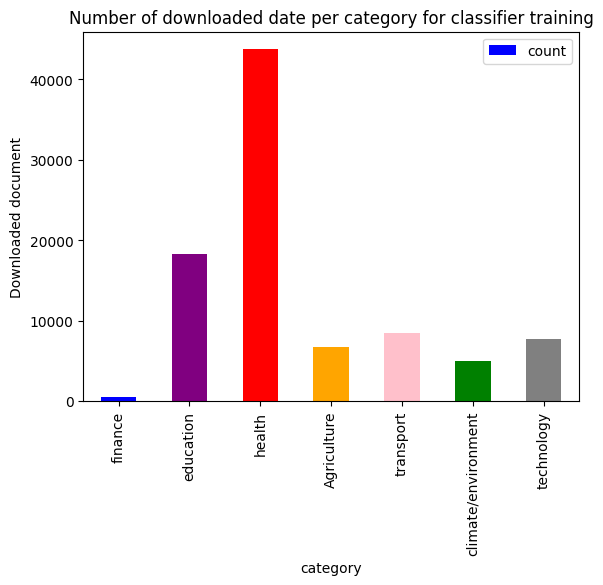

In [268]:
plotFrame.plot.bar(x='category',y='count',ylabel='Downloaded document', color=['blue','purple','red','orange','pink','green','gray'], title="Number of downloaded date per category for classifier training")

graphs for harvest rate

In [222]:
def generateValues(n, factor=1):
    result = np.cumsum(np.random.rand(n))
    return factor * result

def generateCategoryValues(metric, pageCount, factor=1):
    size = len(pageCount)
    harvest_rate_bfs = generateValues(size,0.6)
    harvest_rate_block = generateValues(size)
    harvest_rate_another = generateValues(size,0.5)
    # other ones can be included here
    return pd.DataFrame({
        'Page Count': pageCount,
        'BFS':harvest_rate_bfs,
        'BLOCK':harvest_rate_block,
        'Another':harvest_rate_another
    })
    

In [269]:
# the harvest rate should be for each category

no_pages = np.array(range(0,10000,500))
categories_values = plotFrame['category'].unique()
categories_values
categories_plot_values_harvest = {}
page_count = len(no_pages)
for cat in categories_values:
    categories_plot_values_harvest[cat] = pd.DataFrame(generateCategoryValues('Harvest',no_pages))
categories_plot_values_harvest

{'finance':     Page Count       BFS     BLOCK   Another
 0            0  0.326489  0.352334  0.477401
 1          500  0.871287  0.430617  0.710871
 2         1000  1.350564  0.904699  0.945186
 3         1500  1.895614  0.965398  1.059924
 4         2000  2.262931  1.237468  1.466702
 5         2500  2.384764  1.368132  1.629053
 6         3000  2.743708  1.487083  1.945848
 7         3500  2.754929  1.559218  2.413686
 8         4000  2.888788  2.294927  2.817564
 9         4500  3.366795  2.920203  3.237476
 10        5000  3.944120  2.923650  3.472963
 11        5500  4.339483  3.693421  3.745327
 12        6000  4.616018  3.785640  3.844495
 13        6500  4.856924  4.404964  4.261297
 14        7000  4.940923  4.561041  4.292096
 15        7500  5.263928  5.069607  4.541443
 16        8000  5.296329  5.857630  4.843208
 17        8500  5.893245  6.237690  5.110970
 18        9000  6.347271  6.406143  5.350730
 19        9500  6.673390  6.448091  5.509833,
 'education':     Page

In [214]:
categories_plot_values_harvest['finance']

,Page Count,BFS,Harvest_BLOCK,Another
0,0,0.491566,0.800167,0.404272
1,500,0.632502,0.875434,0.768447
2,1000,1.005717,1.215785,0.905999
3,1500,1.281344,1.253488,1.092265
4,2000,1.754138,1.670105,1.553130
5,2500,1.995978,2.139844,1.555411
6,3000,2.304873,2.451415,1.563297
7,3500,2.787992,3.189887,1.824069
8,4000,2.970920,3.777367,1.961287
9,4500,3.020361,4.223964,2.419055


### Create value for recall for each of the categories

In [215]:
categories_plot_values_recall = {}
for cat in categories_values:
    categories_plot_values_recall[cat] = pd.DataFrame(generateCategoryValues('Recall', no_pages))
categories_plot_values_recall

{'finance':     Page Count       BFS  Harvest_BLOCK   Another
 0            0  0.178166       0.331843  0.252929
 1          500  0.216039       1.192692  0.320562
 2         1000  0.777627       1.838555  0.579315
 3         1500  0.981602       2.759491  0.696036
 4         2000  1.454823       3.666189  0.863955
 5         2500  1.752448       4.452484  1.261726
 6         3000  2.078861       4.468340  1.754589
 7         3500  2.104719       4.504926  1.920690
 8         4000  2.135224       5.074344  2.020735
 9         4500  2.728705       5.139567  2.415996
 10        5000  2.934393       5.605336  2.689944
 11        5500  3.095826       6.149764  2.823358
 12        6000  3.476143       6.665743  3.199502
 13        6500  3.637214       6.691763  3.391426
 14        7000  3.954506       7.646969  3.857585
 15        7500  4.357368       8.076561  4.039693
 16        8000  4.433559       8.343040  4.395157
 17        8500  4.455406       8.635975  4.648890
 18        9000  4.9

In [216]:
categories_plot_values_len = {}
for cat in categories_values:
    categories_plot_values_len[cat] = pd.DataFrame(generateCategoryValues('Target_length', no_pages))
categories_plot_values_recall

{'finance':     Page Count       BFS  Harvest_BLOCK   Another
 0            0  0.178166       0.331843  0.252929
 1          500  0.216039       1.192692  0.320562
 2         1000  0.777627       1.838555  0.579315
 3         1500  0.981602       2.759491  0.696036
 4         2000  1.454823       3.666189  0.863955
 5         2500  1.752448       4.452484  1.261726
 6         3000  2.078861       4.468340  1.754589
 7         3500  2.104719       4.504926  1.920690
 8         4000  2.135224       5.074344  2.020735
 9         4500  2.728705       5.139567  2.415996
 10        5000  2.934393       5.605336  2.689944
 11        5500  3.095826       6.149764  2.823358
 12        6000  3.476143       6.665743  3.199502
 13        6500  3.637214       6.691763  3.391426
 14        7000  3.954506       7.646969  3.857585
 15        7500  4.357368       8.076561  4.039693
 16        8000  4.433559       8.343040  4.395157
 17        8500  4.455406       8.635975  4.648890
 18        9000  4.9

In [217]:
def combineAllCategory(page_count, values, metric):
    keys = list(values.keys())
    result = pd.DataFrame({'Page Count':page_count})
    columns = values[keys[0]].columns
    relevant_col = []
    c=0
    for index, col in enumerate(columns):
        if index ==0:
            continue
        result[col]= np.zeros(len(page_count))
        relevant_col.append(col)
    
    for k in keys:
        for rel in relevant_col:
            result[rel] = result[rel] + values[k][rel]
    return result
        
    

### Now lets start plotting the graphs

define methods for plotting the dictionary as subplots based on the numbers of plots to be shown

In [257]:
def plotSingleCategory(data, metric, axs=None, title=''):
    markers=['o','v','s','p','h','*','^']
    x = data.iloc[:,0].values
    ys = data.iloc[:,1:].values
    if not axs:
        fig, axs = plt.subplots()
        fig.text(title)
    columns = data.columns
    r, c = ys.shape
#         plot each of the lines
    for ind in range(c):
        y = ys[:,ind]
        std = np.std(y)
        axs.errorbar(x,y,yerr=std, label=columns[ind+1], marker=markers[ind])
        if axs:
            axs.set_title(title)
        axs.set_xlabel('Page Crawled')
        axs.set_ylabel(metric)
    axs.legend(loc='upper left')
    
    
def plotDictionary(metric,data):
#     use matplotlib to display this things here
    size = len(data)
    col = 2
#     set the row into grid display
    row = int(math.ceil(size/col))
    fig, axs = plt.subplots(row, col, figsize=(12,15))
    fig.tight_layout(pad=4.0)
    fig.text(0.35,1,'Category plot for: '+metric,fontsize='x-large')
    counter = 0
    markers=['o','v','s','p','h','*','^']
    for d in data:
#         data[d].plot(x=0, xlabel='Page Count', marker=markers)
        x = data[d].iloc[:,0].values
        ys = data[d].iloc[:,1:].values
        columns = data[d].columns
        r, c = ys.shape
        i = int(counter/col)
        j = counter % col
#         plot each of the lines
        temp_holder ={}
        for ind in range(c):
            y = ys[:,ind]
            std = np.std(y)
            axs[i,j].errorbar(x,y, yerr=std, label=columns[ind+1], marker=markers[ind])
            axs[i,j].set_title(metric +" for "+d)
            axs[i,j].set_xlabel('Pages crawled')
            axs[i,j].set_ylabel(metric)
        axs[i,j].legend(loc='upper left')
        counter+=1
    
    item = list(data.keys())[0]
    averageData = combineAllCategory(data[item].iloc[:,0].values, data, metric)
    plotSingleCategory(averageData, metric, axs[3,1], title="Average "+metric+" Across Categories")
    



### Create data to build harvest rate plot for each category

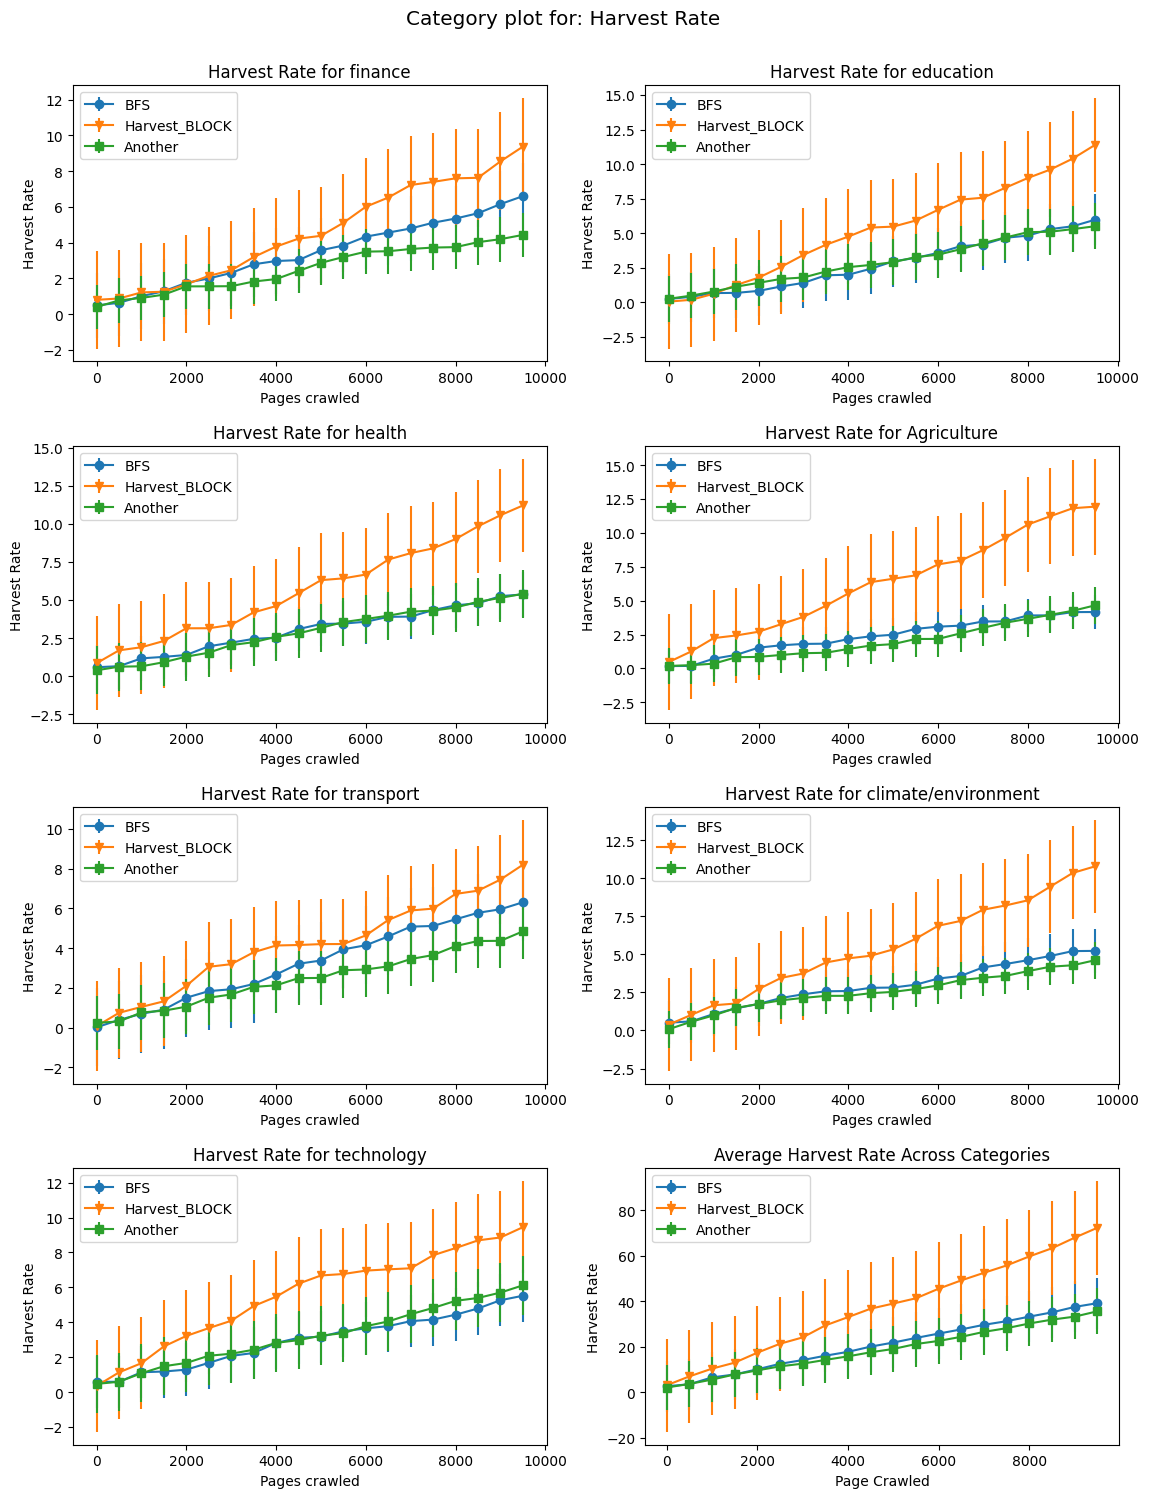

In [256]:
plotDictionary('Harvest Rate',categories_plot_values_harvest)

### Save and plot the graphs for the combine 

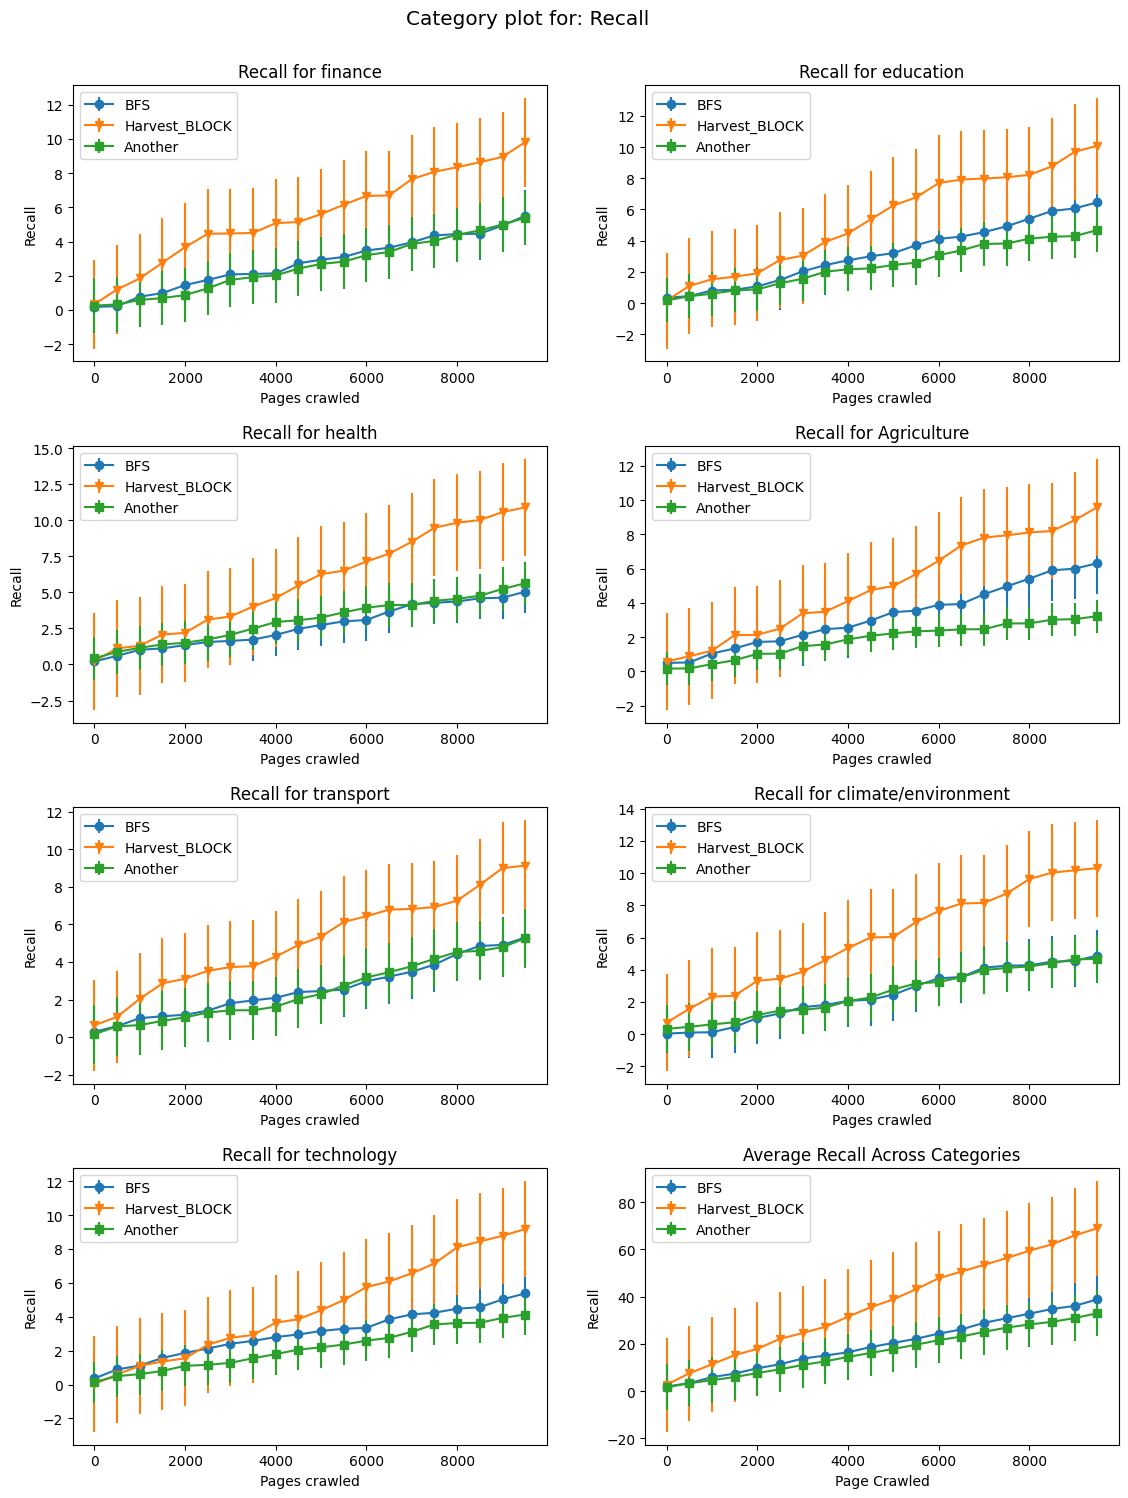

In [258]:
plotDictionary('Target Recall',categories_plot_values_recall)

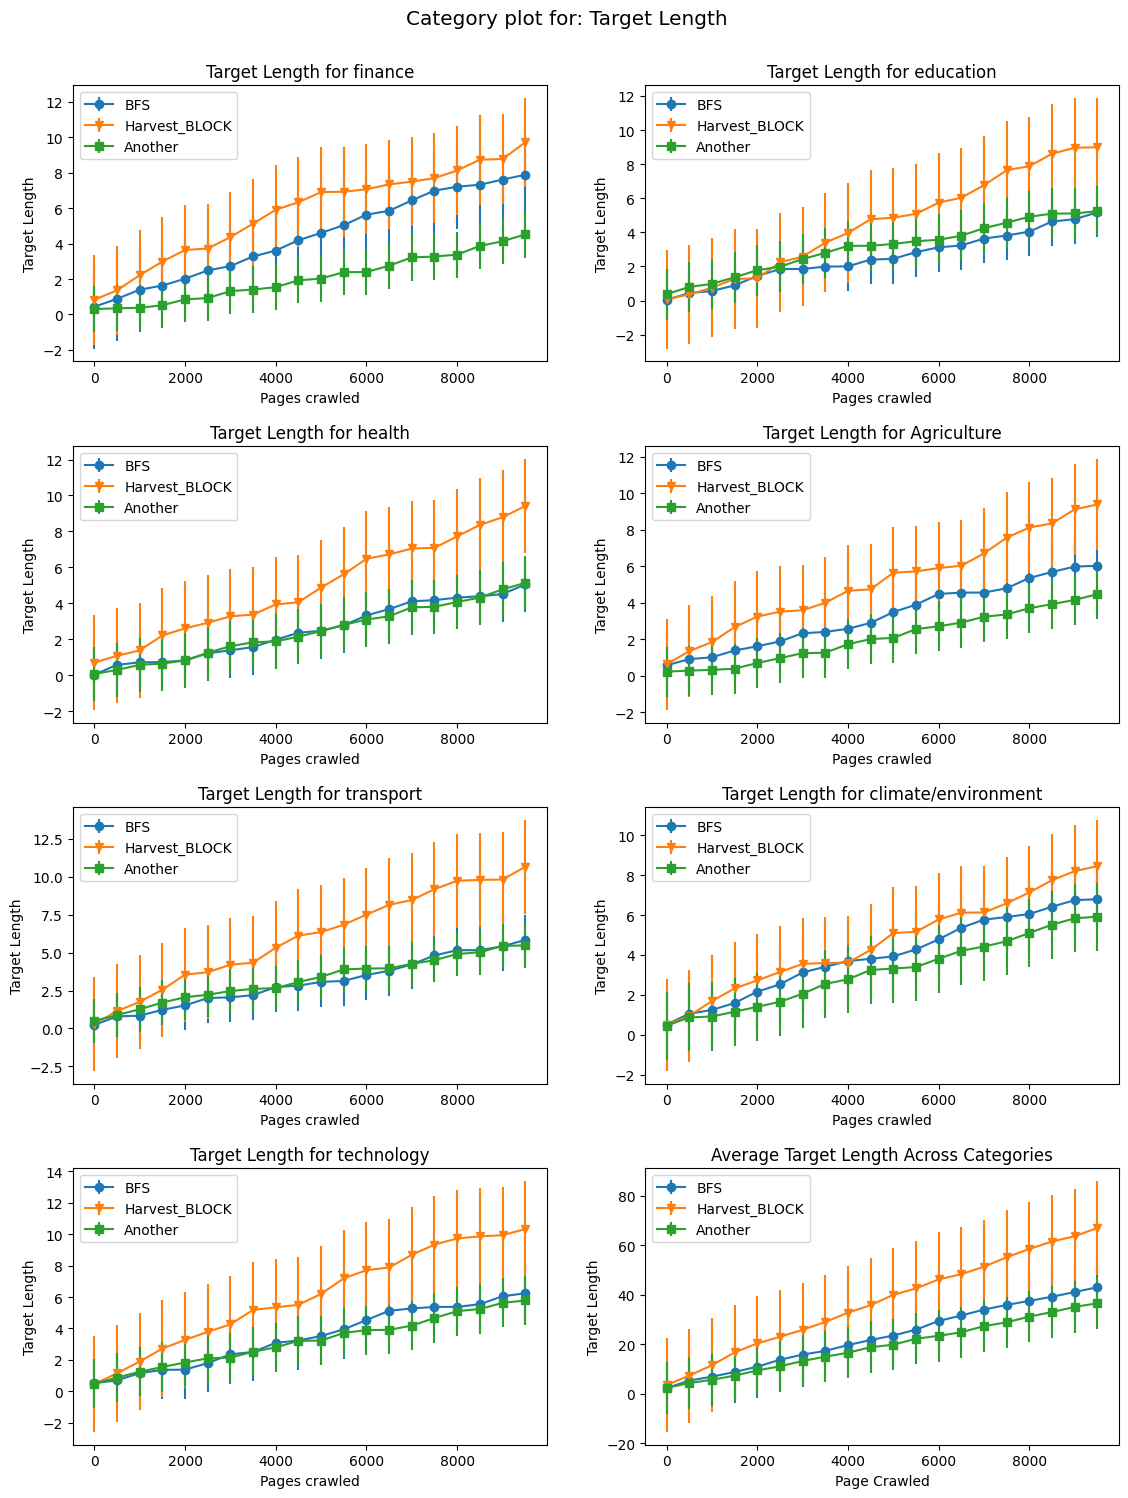

In [270]:
plotDictionary('Target Length',categories_plot_values_len)